<a href="https://colab.research.google.com/github/CamSP/tenicas-ia-opencv/blob/main/Tecnicas%20de%20IA/Taller%204/Taller4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<b><H1>TÉCNICAS DE INTELIGENCIA ARTIFICIAL</H1></b><br><br>
<H2><b>Taller de morfología</H2></b><br>
<H3><b>Docente:</b><br>
Daniel Vargas Medina<br> <br><br>
 <b>Presentan:</b><br>
Brian Camilo Saiz Cavanzo<br>
Camilo Esteban Zambrano Pereira <br><br>
<b>Fecha:</b><br>
3 de abril de 2022<br><br>
</H3></center>

In [201]:

%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
# # import time as t

# from scipy import signal
# from scipy import misc

In [48]:
#Habilitación de Google Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [202]:
#Carga de archivos
cancer = cv2.imread("/content/drive/MyDrive/Colab Notebooks/TIA/Taller_3/fig/Cancer (4).tif", 0) #Se montan las imagenes desde el drive images.png
not_cancer = cv2.imread("/content/drive/MyDrive/Colab Notebooks/TIA/Taller_3/fig/Not Cancer  (1).jpg", 0) #Se montan las imagenes desde el drive

(Text(0.5, 1.0, 'Imagen SIn cancer'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

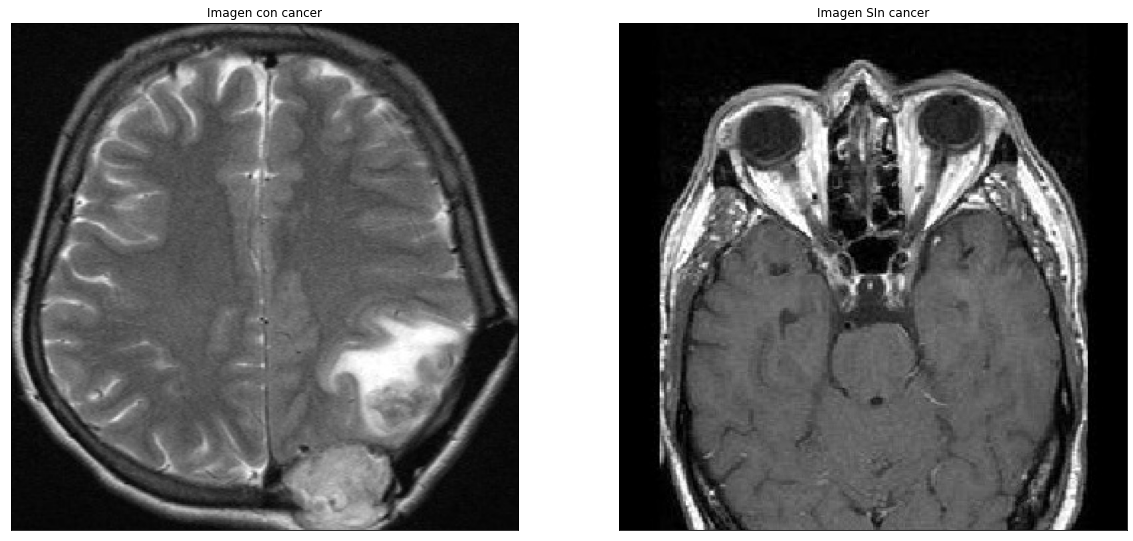

In [203]:
plt.figure(1, figsize=(20,10))
plt.subplot(121), plt.imshow(cancer,cmap='gray')
plt.title('Imagen con cancer'),plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(not_cancer,cmap='gray')
plt.title('Imagen SIn cancer'),plt.xticks([]),plt.yticks([])

# **Contorno**


## **cv2.findContours**

In [204]:
#Umbralización
th, binary_c = cv2.threshold(cancer, 127, 255, cv2.THRESH_BINARY)
th, binary_nc = cv2.threshold(not_cancer, 127, 255, cv2.THRESH_BINARY)

(Text(0.5, 1.0, 'Imagen + Contornos sin cancer'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

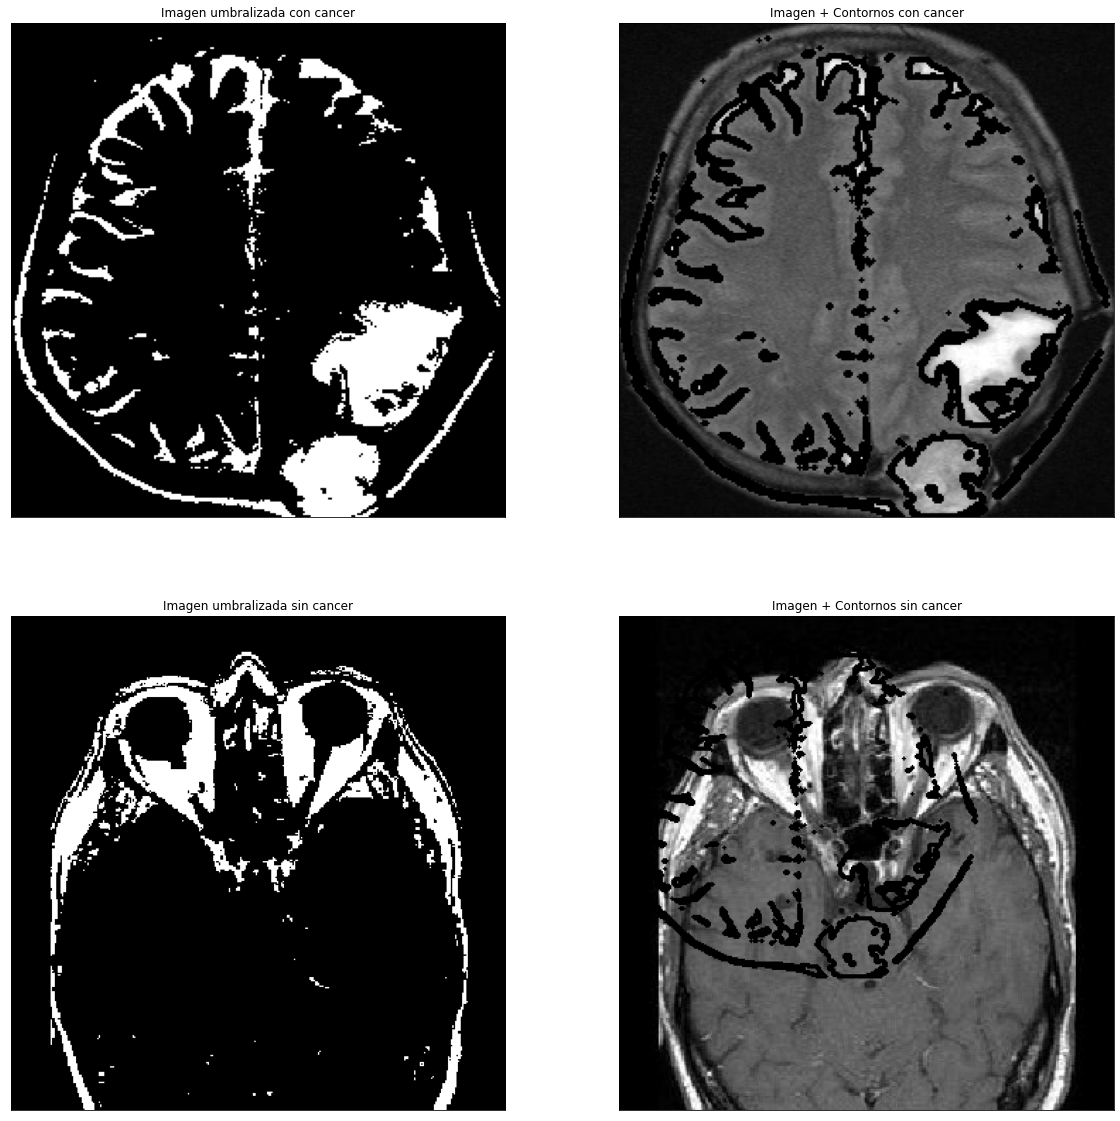

In [205]:
#Búsqueda de contornos
contours_c, hierarchy_c = cv2.findContours(binary_c,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours_nc, hierarchy_nc = cv2.findContours(binary_nc,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#Visualización de contornos
cv2.drawContours(cancer,contours_c,-1,(0,0,0),2)
cv2.drawContours(not_cancer,contours_c,-1,(0,0,0),2)

#Visualización
plt.figure(1, figsize=(20,20))
plt.subplot(221), plt.imshow(binary_c,cmap='gray')
plt.title('Imagen umbralizada con cancer'),plt.xticks([]),plt.yticks([])
plt.subplot(222), plt.imshow(cancer,cmap='gray')
plt.title('Imagen + Contornos con cancer'),plt.xticks([]),plt.yticks([])
plt.subplot(223), plt.imshow(binary_nc,cmap='gray')
plt.title('Imagen umbralizada sin cancer'),plt.xticks([]),plt.yticks([])
plt.subplot(224), plt.imshow(not_cancer,cmap='gray')
plt.title('Imagen + Contornos sin cancer'),plt.xticks([]),plt.yticks([])

## **

(Text(0.5, 1.0, 'Imagen umbralizada de cancer'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

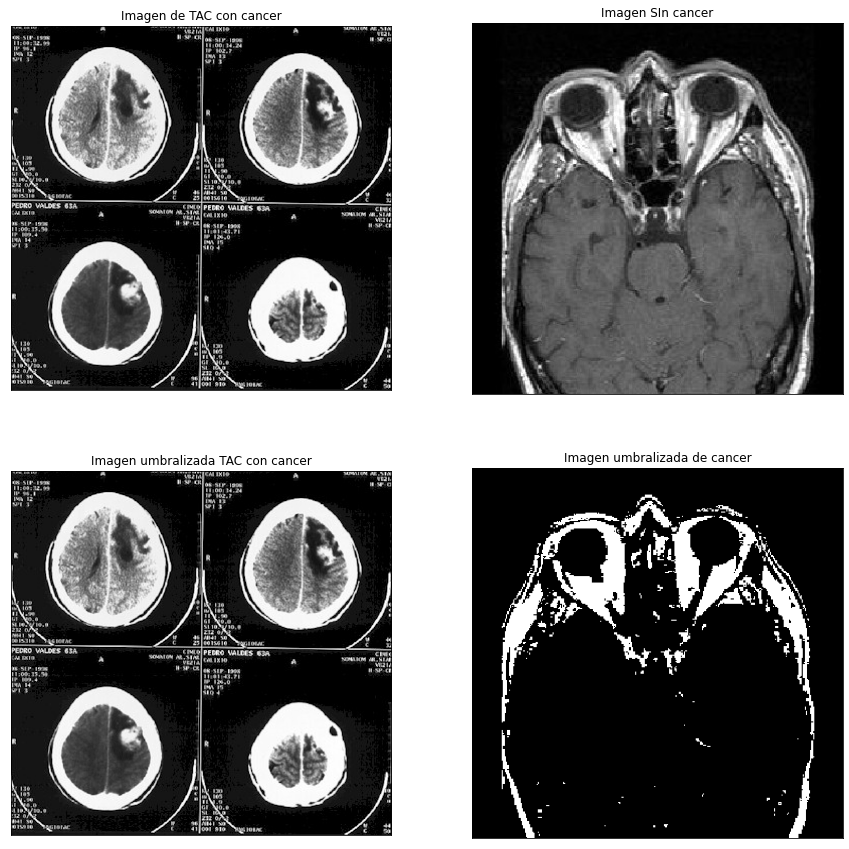

In [206]:
#Carga de archivos
cancer = cv2.imread("/content/drive/MyDrive/Colab Notebooks/TIA/Taller_3/fig/meningiom2.jpg") #Se montan las imagenes desde el drive images.png meningiom2.jpg Cancer (4).tif crucigrama.jpg
not_cancer = cv2.imread("/content/drive/MyDrive/Colab Notebooks/TIA/Taller_3/fig/Not Cancer  (1).jpg", 0) #Se montan las imagenes desde el drive

#Umbralización
th, binary_c = cv2.threshold(cancer, 120, 255, cv2.THRESH_BINARY)
binary_c = cv2.cvtColor(cancer, cv2.COLOR_BGR2GRAY)
th, binary_nc = cv2.threshold(not_cancer, 127, 255, cv2.THRESH_BINARY)

#Visualización
plt.figure(1, figsize=(15,15))
plt.subplot(221), plt.imshow(cancer,cmap='gray')
plt.title('Imagen de TAC con cancer'),plt.xticks([]),plt.yticks([])
plt.subplot(222), plt.imshow(not_cancer,cmap='gray')
plt.title('Imagen SIn cancer'),plt.xticks([]),plt.yticks([])
plt.subplot(223), plt.imshow(binary_c,cmap='gray')
plt.title('Imagen umbralizada TAC con cancer'),plt.xticks([]),plt.yticks([])
plt.subplot(224), plt.imshow(binary_nc,cmap='gray')
plt.title('Imagen umbralizada de cancer'),plt.xticks([]),plt.yticks([])

In [ ]:
edges_c = cv2.Canny(binary_c, 50, 150, apertureSize = 3)

#Hough
lines = cv2.HoughLines(edges_c,1,np.pi/180,180)
print (lines)

#Bucle para dibujo de líneas 1:05:20 
for line in lines:
  rho_c, theta_c = line[0]
  a=np.cos(theta_c)
  b=np.sin(theta_c)
  x0=a*rho_c
  y0=b*rho_c
  x1=int(x0+1000*(-b))
  y1=int(y0+1000*(a))
  x2=int(x0-1000*(-b))
  y2=int(y0-1000*(a))
  cv2.line(cancer,(x1,y1),(x2,y2),(57,255,20),1, cv2.LINE_AA)

#Visualización
plt.figure(1, figsize=(20,20))
plt.subplot(121), plt.imshow(binary_c ,cmap='gray')
plt.title('Imagen umbralizada con cancer'),plt.xticks([]),plt.yticks([])
plt.subplot(122), plt.imshow(cancer,cmap='gray')
plt.title('Imagen + Contornos con cancer'),plt.xticks([]),plt.yticks([])

  

# **Similitud**